In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

Create the SpaceTimeSeries class, which will help organize the data.

In [2]:
class SpaceTimeSeries:
    """ A class to organize data that is a function of both space and time
    """
    
    def __init__(self, time, x, y, z):
        self.npoints = len(time)
        self.index = {}
        self.index['time'] = []
        self.index['pos'] = {}
        self.index['pos']['x'] = []
        self.index['pos']['y'] = []
        self.index['pos']['z'] = []
        self.add_index(time, x, y, z)
        self.curves = {}
        self.nrows = 0
        self.ncurves = []
        self.legend = {}
    
    def add_index(self, time, x, y, z):
        """ Add the time and position indices.
        Some validation should be added to check that these all have the same number of points, etc.
        """
        self.index['time'] = time
        self.index['pos']['x'] = x
        self.index['pos']['y'] = y
        self.index['pos']['z'] = z
    
    def add_curve(self, group, label, yvals):
        """ Ddd a curve to the dict, update some numbers and the labels.
        """
        self.curves.setdefault(group,{})
        self.curves[group][label] = yvals
        self.nrows = len(self.curves)
        self.ncurves = [len(self.curves[group]) for group in self.curves]
        self.legend.setdefault(group,[])
        self.legend[group].append(label)


Define a function that uses a SpaceTimeSeries object to generate a plot.

In [3]:
def spacetimeseries_plot(spacetimeseries):
    """ make a plot from a spacetimeseries object
    """
    
    ## set up some parameters for the plot
    npts = spacetimeseries.index['time'].shape[0]
    nrows = spacetimeseries.nrows
    groups = list(spacetimeseries.curves.keys())
    ncurves = spacetimeseries.ncurves
    lines = []

    ## get the figure and axes objects
    fig,axs = plt.subplots(
        sharex=True,
        nrows=nrows
    )

    ## plot the data, keep the 2DLine objects, and set the labels 
    for i,ncurve in zip(range(nrows), ncurves):
        for j in range(ncurve):
            leglabel = spacetimeseries.legend[groups[i]][j]
            line = axs[i].plot(
                    spacetimeseries.curves[groups[i]][leglabel],
                    label=leglabel
                )
            lines.append(line)
        axs[i].set_ylabel(groups[i])

    ## set up the spacetime ticks
    locs = axs[-1].get_xticks() # indices
    locs = locs[locs >= 0.0]
    locs = locs[locs <= npts]

    labels = [
        f'{t[11:]}\n{x:3.2f}\n{y:3.2f}\n{z:3.2f}'
            for t,x,y,z in
                zip(
                    np.datetime_as_string(spacetimeseries.index['time'][locs.astype(int)],'s'),
                    spacetimeseries.index['pos']['x'][locs.astype(int)],
                    spacetimeseries.index['pos']['y'][locs.astype(int)],
                    spacetimeseries.index['pos']['z'][locs.astype(int)]
            )
    ]
    axs[-1].set_xticklabels([''] + labels + [''])

    ## label the spacetime ticks
    axs[-1].text(
        -.05,
        -.07,
        np.datetime_as_string(spacetimeseries.index['time'][0],'D')+'\nX\nY\nZ',
        horizontalalignment='right',
        verticalalignment='top',
        transform=axs[-1].transAxes
    )
    return fig, axs, lines

Create some curves which are a function of space and time.

In [4]:
npoints = 65
x_ut = np.arange('2005-02-25T03:30:05', '2005-02-25T03:31:10', dtype='datetime64[s]')
x_xpos = np.linspace(0.0,1.0,npoints)
x_ypos = np.linspace(0.0,5.0,npoints)
x_zpos = np.zeros(npoints) + 0.003

y1_1 = .75 * np.exp(-1 * (x_xpos - 0.50)**2/(2 * 0.10**2)) + .6  * np.exp(-1 * (x_xpos - 0.75)**2/(2 * 0.07**2)) - .6 * np.exp(-1 * (x_xpos - 0.40)**2/(2 * 0.20**2))
y1_2 = 0.8 * (.75 * np.exp(-1 * (x_xpos - 0.50)**2/(2 * 0.10**2)) + .6  * np.exp(-1 * (x_xpos - 0.75)**2/(2 * 0.07**2)) - .6 * np.exp(-1 * (x_xpos - 0.40)**2/(2 * 0.20**2)))
y2 = -.75 * np.exp(-1 * (x_xpos - 0.50)**2/(2 * 0.10**2)) - .6  * np.exp(-1 * (x_xpos - 0.75)**2/(2 * 0.07**2))
y3 = .6  * np.exp(-1 * (x_xpos - 0.75)**2/(2 * 0.07**2))

Initialize a SpaceTimeSeries instance and add the data to it.

In [5]:
data = SpaceTimeSeries(time=x_ut,x=x_xpos,y=x_ypos,z=x_zpos)
data.add_curve('y1','y1_1',y1_1)
data.add_curve('y1','y1_2',y1_2)
data.add_curve('y2','y2',y2)

Plot the data, and modify the lines and axes.

/var/folders/dc/md9grtsn6yngh5zxt7n1stgc0000gr/T/ipykernel_81233/1882197128.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_xticklabels([''] + labels + [''])


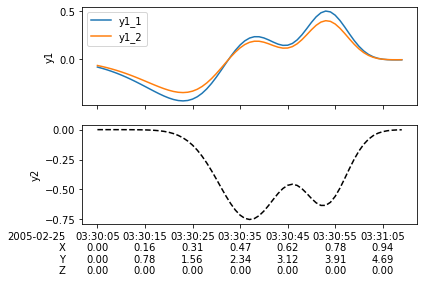

In [6]:
fig,axs,lines = spacetimeseries_plot(data)

lines[2][0].set_linestyle('--')
lines[2][0].set_color('k')
axs[0].legend()

Some caveats remain:
- I haven't built anything in to help modify the x-range after the plot is created. I think this will disturb the ticks, which are the whole reason I did this example. I recommend cropping the data before creating the SpaceTimeSeries object.
- I didn't work out how to exactly match the vertical alignment of the tick labels to the ticks themselves. This is hardcoded into the plotting function, so I'm sure it will break when the size of the plot is different. I'm sure there's a way to do it, so if you know please make a suggestion.